# Librerías

In [4]:
from datetime   import datetime
import pandas   as pd
import numpy    as np
import warnings
import scipy.stats as stats
import math

#Para gráficos y mapas de calor
import seaborn            as sb
import matplotlib.pyplot  as plt
import plotly.graph_objs  as go

#Para la imputación de los datos
from sklearn.impute     import SimpleImputer
from sklearn.compose    import ColumnTransformer
import missingno        as msno

#Para el pre-procesamiento de los datos
from sklearn.preprocessing      import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection  import SelectKBest, chi2


#Para generar los modelos
from sklearn.model_selection    import train_test_split
from sklearn.metrics            import mean_squared_error, r2_score
import statsmodels.api          as sm
import statsmodels.formula.api  as smf


# Suprimir los warnings específicos
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Lectura


In [6]:
saber11_df = pd.read_parquet("saber11_limpio-2.parquet")
saber11_df.shape[0]

3172551

Para poder identificar el tipo de dato de las columnas y si tienen alguna novedad que debamos tener en cuenta para tratar los datos correctamente  utilizaremos el comando ".info()" para ver el tipo de dato de cada campo .

- Encontramos que todos los datos cargados del dataframe son de tipo "object" 
- Por lo que mas adelante se tendra que modificar el tipo de dato en algunos campos para poder tratarlos correctamente

In [7]:
saber11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172551 entries, 0 to 3172550
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   cole_area_ubicacion       object 
 1   cole_bilingue             object 
 2   cole_calendario           object 
 3   cole_caracter             object 
 4   cole_depto_ubicacion      object 
 5   cole_genero               object 
 6   cole_naturaleza           object 
 7   cole_sede_principal       object 
 8   estu_depto_presentacion   object 
 9   estu_depto_reside         object 
 10  estu_genero               object 
 11  fami_estratovivienda      object 
 12  fami_personashogar        object 
 13  fami_tieneautomovil       object 
 14  fami_tienecomputador      object 
 15  fami_tieneinternet        object 
 16  fami_tienelavadora        object 
 17  punt_ingles               float64
 18  punt_matematicas          float64
 19  punt_sociales_ciudadanas  float64
 20  punt_c_naturales        

El dataset cuenta con 51 columnas, que abarcan:

Identificación y datos personales del estudiante: tipo de documento, género, fecha de nacimiento, departamento y municipio de residencia.
Información del establecimiento educativo: nombre, código DANE, ubicación geográfica, calendario, carácter, jornada y naturaleza del colegio.

Contexto familiar: nivel educativo de los padres, número de personas en el hogar y acceso a bienes como computador, internet o lavadora.

Resultados académicos: puntajes por área (lectura crítica, matemáticas, ciencias naturales, sociales e inglés) y el puntaje global.

In [8]:
saber11_df.head(4)

,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_depto_ubicacion,cole_genero,cole_naturaleza,cole_sede_principal,estu_depto_presentacion,estu_depto_reside,estu_genero,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estu_edad_anios,mismo_municipio_prueba,mismo_municipio_colegio,cole_jornada_cat,fami_educacionmadre_num,fami_educacionpadre_num,fami_cuartoshogar_num
0,RURAL,N,A,TÉCNICO/ACADÉMICO,HUILA,MIXTO,OFICIAL,N,HUILA,HUILA,F,Estrato 2,1 a 2,No,Si,Si,Si,71.0,66.0,70.0,65.0,69.0,339.0,16.0,1,1,Unica,9,2,2
1,URBANO,N,A,TÉCNICO/ACADÉMICO,HUILA,MIXTO,OFICIAL,S,HUILA,HUILA,F,Estrato 1,5 a 6,No,No,No,No,46.0,43.0,31.0,40.0,43.0,199.0,17.0,1,1,Unica,1,1,2
2,URBANO,N,A,TÉCNICO/ACADÉMICO,VALLE,MIXTO,OFICIAL,S,VALLE,VALLE,M,Estrato 5,5 a 6,Si,Si,Si,Si,59.0,57.0,46.0,57.0,57.0,272.0,15.0,1,1,Parcial_Diurna,3,4,4
3,URBANO,N,A,TÉCNICO/ACADÉMICO,ANTIOQUIA,MIXTO,NO OFICIAL,S,ANTIOQUIA,ANTIOQUIA,F,Estrato 2,5 a 6,No,No,Si,Si,44.0,53.0,54.0,44.0,54.0,253.0,17.0,0,1,Parcial_Flexible,3,1,5


Entrenamiento: (2220785, 24)
Validación: (475883, 24)
Prueba: (475883, 24)

🔹 Entrenando modelo CatBoost para: punt_lectura_critica


2025/11/09 16:09:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/09 16:09:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo punt_lectura_critica registrado en MLflow con R²_test = 0.311

🔹 Entrenando modelo CatBoost para: punt_matematicas


2025/11/09 16:14:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/09 16:14:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo punt_matematicas registrado en MLflow con R²_test = 0.354

🔹 Entrenando modelo CatBoost para: punt_sociales_ciudadanas


2025/11/09 16:18:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/09 16:18:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo punt_sociales_ciudadanas registrado en MLflow con R²_test = 0.297

🔹 Entrenando modelo CatBoost para: punt_c_naturales


2025/11/09 16:23:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/09 16:23:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo punt_c_naturales registrado en MLflow con R²_test = 0.343

🔹 Entrenando modelo CatBoost para: punt_ingles


2025/11/09 16:27:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/09 16:27:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo punt_ingles registrado en MLflow con R²_test = 0.433

📊 Resultados en conjunto de VALIDACIÓN:


,MAE,RMSE,R²
punt_lectura_critica,6.755894,8.470275,0.313312
punt_matematicas,7.538140,9.532425,0.357515
punt_sociales_ciudadanas,7.700166,9.606695,0.298772
punt_c_naturales,6.710645,8.442188,0.344071
punt_ingles,7.136460,9.236070,0.435132



📈 Resultados en conjunto de PRUEBA:


,MAE,RMSE,R²
punt_lectura_critica,6.766353,8.488208,0.310881
punt_matematicas,7.528430,9.530467,0.354028
punt_sociales_ciudadanas,7.699005,9.614795,0.296934
punt_c_naturales,6.712203,8.442086,0.342658
punt_ingles,7.153513,9.246882,0.432781


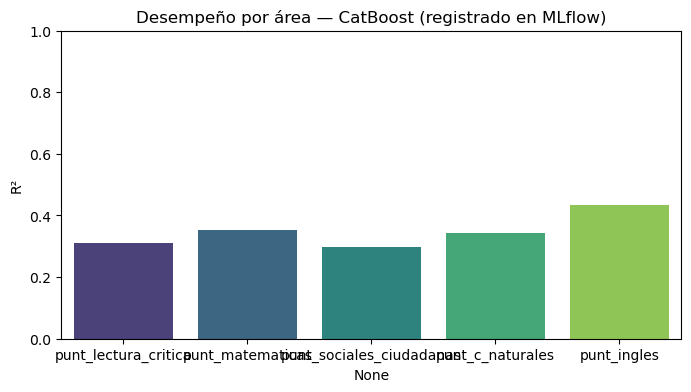

In [ ]:
# ===============================================================
# MODELO CATBOOST POR ÁREA + REGISTRO EN MLFLOW (COMPLETO)
# ===============================================================

# -----------------------------
#  Importaciones
# -----------------------------
import mlflow
import mlflow.catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================================================
# Variables predictoras y objetivos
# ===============================================================
X = saber11_df[[
    'cole_area_ubicacion',
    'cole_bilingue',
    'cole_calendario',
    'cole_caracter',
    'cole_depto_ubicacion',
    'cole_genero',
    'cole_naturaleza',
    'cole_sede_principal',
    'estu_depto_presentacion',
    'estu_depto_reside',
    'estu_genero',
    'fami_estratovivienda',
    'fami_personashogar',
    'fami_tieneautomovil',
    'fami_tienecomputador',
    'fami_tieneinternet',
    'fami_tienelavadora',
    'mismo_municipio_prueba',
    'mismo_municipio_colegio',
    'cole_jornada_cat',
    'fami_educacionmadre_num',
    'fami_educacionpadre_num',
    'fami_cuartoshogar_num',
    'estu_edad_anios'
]]

Y = saber11_df[[
    'punt_lectura_critica',
    'punt_matematicas',
    'punt_sociales_ciudadanas',
    'punt_c_naturales',
    'punt_ingles'
]]

# ===============================================================
#  División de datos: 70% train, 15% val, 15% test
# ===============================================================
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.30, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.50, random_state=42)

print(f"Entrenamiento: {X_train.shape}")
print(f"Validación: {X_val.shape}")
print(f"Prueba: {X_test.shape}")

# ===============================================================
# Configuración inicial de MLflow
# ===============================================================
mlflow.set_experiment("Saber11_CatBoost_Areas")

# ===============================================================
# Identificar variables categóricas
# ===============================================================
cat_features = X_train.select_dtypes(include='object').columns.tolist()

for df_ in [X_train, X_val, X_test]:
    for col in cat_features:
        df_[col] = df_[col].astype(str)

# ===============================================================
# Entrenamiento y registro de modelos por área
# ===============================================================
metricas_val = {}
metricas_test = {}

for col in Y_train.columns:
    print(f"\n🔹 Entrenando modelo CatBoost para: {col}")

    with mlflow.start_run(run_name=f"CatBoost_{col}"):

        modelo = CatBoostRegressor(
            iterations=500,
            learning_rate=0.05,
            depth=8,
            loss_function='RMSE',
            cat_features=cat_features,
            random_seed=42,
            verbose=False,
            early_stopping_rounds=50,
            allow_writing_files=False
        )

        modelo.fit(
            X_train, Y_train[col],
            eval_set=(X_val, Y_val[col]),
            use_best_model=True
        )

        # -----------------------------
        # Validación
        # -----------------------------
        y_pred_val = modelo.predict(X_val)
        mae_val = mean_absolute_error(Y_val[col], y_pred_val)
        rmse_val = np.sqrt(mean_squared_error(Y_val[col], y_pred_val))
        r2_val = r2_score(Y_val[col], y_pred_val)
        metricas_val[col] = [mae_val, rmse_val, r2_val]

        # -----------------------------
        # Prueba
        # -----------------------------
        y_pred_test = modelo.predict(X_test)
        mae_test = mean_absolute_error(Y_test[col], y_pred_test)
        rmse_test = np.sqrt(mean_squared_error(Y_test[col], y_pred_test))
        r2_test = r2_score(Y_test[col], y_pred_test)
        metricas_test[col] = [mae_test, rmse_test, r2_test]

        # -----------------------------
        # Registro en MLflow
        # -----------------------------
        mlflow.log_param("iterations", 500)
        mlflow.log_param("learning_rate", 0.05)
        mlflow.log_param("depth", 8)
        mlflow.log_param("loss_function", "RMSE")
        mlflow.log_param("early_stopping_rounds", 50)
        mlflow.log_param("cat_features_count", len(cat_features))

        mlflow.log_metric("MAE_val", mae_val)
        mlflow.log_metric("RMSE_val", rmse_val)
        mlflow.log_metric("R2_val", r2_val)
        mlflow.log_metric("MAE_test", mae_test)
        mlflow.log_metric("RMSE_test", rmse_test)
        mlflow.log_metric("R2_test", r2_test)

        # Guardar modelo
        mlflow.catboost.log_model(modelo, artifact_path=f"CatBoost_{col}")

        print(f"Modelo {col} registrado en MLflow con R²_test = {r2_test:.3f}")

# ===============================================================
# Resumen de métricas
# ===============================================================
metricas_val_df = pd.DataFrame(metricas_val, index=['MAE', 'RMSE', 'R²']).T
metricas_test_df = pd.DataFrame(metricas_test, index=['MAE', 'RMSE', 'R²']).T

print("\n Resultados en conjunto de VALIDACIÓN:")
display(metricas_val_df)
print("\nResultados en conjunto de PRUEBA:")
display(metricas_test_df)

# ===============================================================
# Visualización de desempeño
# ===============================================================
plt.figure(figsize=(12,4))
sns.barplot(x=metricas_test_df.index, y=metricas_test_df['R²'], palette='viridis')
plt.title("Desempeño por área — CatBoost (registrado en MLflow)")
plt.ylabel("R²")
plt.ylim(0,1)
plt.show()
